# Please use this notebook to load in your own data to test out the preprocess helper!

In [1]:
from preprocess_help import DataPreProcess

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pickle
import seaborn as sns

#### Load your data

In [2]:
#my_df = pd.read_csv("PUT YOUR FILENAME HERE") # LOAD YOUR DATA HERE!
my_df = sns.load_dataset('penguins')
print(my_df.shape)
my_df.head(3)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


#### Initialize the class

In [3]:
preprocessor = DataPreProcess(my_df) # pass in your data frame

#### Use the "process_columns" method to step through each column and decide what to do with it
options are: ['skip', 'id', 'response', 'float', 'category', 'binary', 'ordinal', 'other']
* **skip**: this is for columns you don't want to use in your pipeline or modeling
* **id**: id columns will not be used in your pipeline TODO: these are meant to be saved for use later if needed to match back to original data.
* **response**: if chosen you'll have the option to keep the response as a float, string, or one-hot encode this TODO: do the transformation and return in another method
* **float**: if chosen you will have the option to view what the yeo-johnson transformation looks like and then choose if you want this column transformed in the preprocessing pipeline
* **category**: this will one-hot encode the column in the pipeline. TODO: allow option to keep as string (ex when using a tree-based method that allows categories)
* **binary**: this will treat the column like a normal float column. TODO: are there any special treatments for binary variables?
* **ordinal**: at the moment it will treat it like a float. TODO: look into any special treatments for ordinal variables?
* **other**: this will ignore the column in the pipeline. TODO: let the data scientist review the 'other' columns again later

_____________________________
Pre-processing selection

100%	[                                                  ] 7/7 columns


*** sex *** 


count      333
unique       2
top       Male
freq       168
Name: sex, dtype: object
11 (3%) number of NAs



Do you want to see the distribution? (yes/[no]) 
 yes


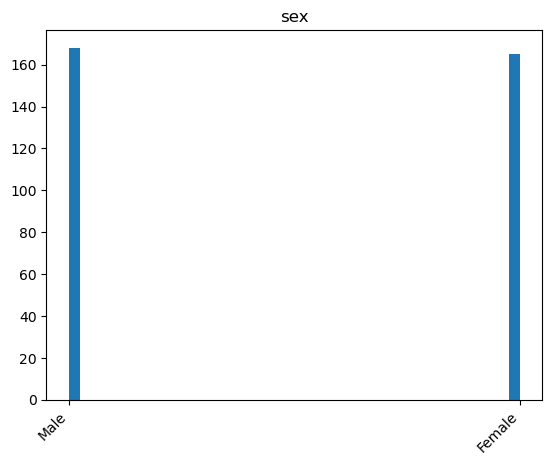


What type of data should this be? Options are: ['skip', 'id', 'response', 'float', 'category', 'binary', 'ordinal', 'other']
 category


sex will be used as a categorical feature

DONE :)
***********


In [4]:
preprocessor.process_columns()

_____________________________
Pre-processing selection

100%	[                                                  ] 1/1 columns


*** body_mass_g *** 


count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64
2 (1%) number of NAs



Do you want to see the distribution? (yes/[no]) 
 yes


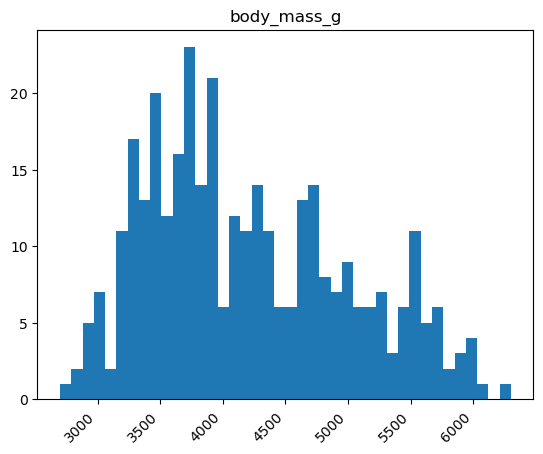


What type of data should this be? Options are: ['skip', 'id', 'response', 'float', 'category', 'binary', 'ordinal', 'other']
 float
body_mass_g is floating point, do you want to check transformations? (yes/[no])  yes


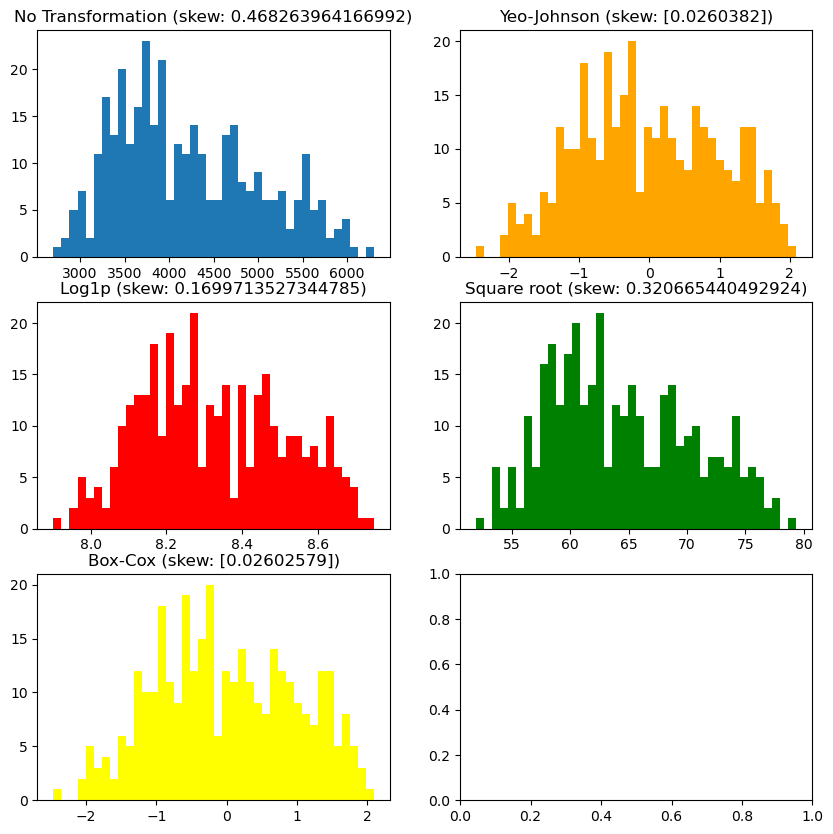

Best option is: box-cox, which has skew of [0.02602579]



Which transformation do you want to make? ('yeojohnson', 'box-cox', 'log1p', 'square root', [none])  



DONE :)
***********


In [5]:
# process or update a single column
preprocessor.process_columns('body_mass_g')

In [6]:
preprocessor.skew_transformer

{'bill_length_mm': 'none',
 'bill_depth_mm': 'none',
 'flipper_length_mm': 'box-cox',
 'body_mass_g': 'none'}

#### Create the pipeline. this will create the pipeline framework that fits the decisions made above

In [7]:
preprocessor.create_pipeline() # this will create the pipeline with the steps that fit your decisions above


How do you want to treat category variables? Options are:
['One-hot encoding', 'leave as string']
 leave as string


#### Fit the pipeline with data. If no dataframe is passed, it will use the original dataframe seen above. Or you can do your test/train split and then pass your training dataframe to fit the pipeline. 

As long as the columns have the same name, there is no need to specify which columns to keep because you've already decided what to do with them. You can pass the whole dataframe

In [8]:
from sklearn.model_selection import train_test_split

y = preprocessor.return_response_values() # use the class to return the response column you specified. if not specified, just prints message

X_train, X_test, y_train, y_test = train_test_split(my_df, y, test_size=0.33, random_state=42)

In [9]:
preprocessor.float_cols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [10]:
#preprocessor.fit_pipeline() # fit the pipeline. if no dataframe is passed it will fit on the orinigal dataframe
preprocessor.fit_pipeline(X_train)

[Pipeline] ... (step 1 of 7) Processing numeric_capping, total=   0.0s
[Pipeline]  (step 2 of 7) Processing numeric_imputation, total=   0.0s
[Pipeline]  (step 3 of 7) Processing category_null_value, total=   0.0s
[Pipeline]  (step 4 of 7) Processing rare_level_grouping, total=   0.0s
[Pipeline] .... (step 5 of 7) Processing nominal_encode, total=   0.0s
[Pipeline]  (step 6 of 7) Processing float transformers, total=   0.1s
[Pipeline] ............ (step 7 of 7) Processing minmax, total=   0.0s


#### You can now return the pipeline to be used later

In [11]:
my_pipe = preprocessor.return_pipeline()
my_pipe

Pipeline(steps=[('numeric_capping',
                 CappingTransformer(capping_values={'bill_depth_mm': [14.2,
                                                                      19.5],
                                                    'bill_length_mm': [36.5,
                                                                       51.01],
                                                    'body_mass_g': [3245.0,
                                                                    5355.0],
                                                    'flipper_length_mm': [185.0,
                                                                          220.0]},
                                    quantiles={'bill_depth_mm': [0.1, 0.9],
                                               'bill_length_mm': [0.1, 0.9],
                                               'body_mass_g': [0.1, 0.9],
                                               'flipper_length_mm': [0.1,
                                                                     0.9]})),
                ('numeric_imputation',
                 MeanImputer(co...
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('box',
                                                  PowerTransformer(method='box-cox'),
                                                  ['flipper_length_mm'])],
                                   verbose_feature_names_out=False)),
                ('minmax',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('min_max_ct', MinMaxScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g'])],
                                   verbose_feature_names_out=False))],
         verbose=True)

#### You can also use a fitted pipeline to transform new data.

Again, you don't have to clean up the dataframe, you've decided what columns you want to keep and as long as all of those columns are present in your new dataframe it will transform the data

In [12]:
transform_test_df = preprocessor.transform_new_data(X_test)
transform_test_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island,sex
194,0.992419,0.924528,0.380417,0.144550,2,1
157,0.599586,0.679245,0.442008,0.334123,2,0
225,0.689180,0.000000,0.770900,0.618483,1,0
208,0.599586,0.452830,0.216713,0.002370,2,0
318,0.820124,0.037736,0.587089,0.654028,1,0
...,...,...,...,...,...,...
126,0.158511,0.641509,0.216713,0.014218,0,0
282,0.634045,0.000000,0.866913,0.547393,1,0
59,0.075810,0.924528,0.316654,0.239336,1,1
111,0.627154,1.000000,0.216713,0.642180,1,1


#### Finally, you can save the fitted preprocessor in a pickle file to be loaded later

In [ ]:
# to save fitted class as pickle
with open('my_preprocesser.pkl', 'wb') as file:
    pickle.dump(preprocessor, file)
    
# to load pickled preprocessor later
with open('my_preprocesser.pkl', 'rb') as file:
    preprocessor = pickle.load(file)